In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('winequality-red.csv')     # dataset from Lesson17
df.columns = df.columns.str.replace(' ', '_')

# Classification

In [3]:
df_copy = df.copy()
df.loc[df_copy['quality'] >= 6, 'quality'] = 1    # good wine
df.loc[df_copy['quality'] < 6, 'quality'] = 0     # bad wine

In [4]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [6]:
X = df.iloc[:, :11]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=15)

**Decision Tree Classifier**

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Gini
# Decision Tree with depth 3
tree_3 = DecisionTreeClassifier(max_depth=3, random_state=15)
tree_3.fit(X_train, y_train)

y_pred = tree_3.predict(X_test)
print('Decision Tree with depth 3:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, tree_3.predict(X_train))}')

# Decision Tree with depth 6
tree_6 = DecisionTreeClassifier(max_depth=6, random_state=15)
tree_6.fit(X_train, y_train)

y_pred = tree_6.predict(X_test)
print('\nDecision Tree with depth 6:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, tree_6.predict(X_train))}')

# Decision Tree with depth 10
tree_10 = DecisionTreeClassifier(max_depth=10, random_state=15)
tree_10.fit(X_train, y_train)

y_pred = tree_10.predict(X_test)
y_pred_train = tree_10.predict(X_train)
print('\nDecision Tree with depth 10:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, y_pred_train)}')

Decision Tree with depth 3:
Test F1-score = 0.7681660899653978
Train F1-score = 0.7730968218773097

Decision Tree with depth 6:
Test F1-score = 0.7251908396946564
Train F1-score = 0.8415124698310539

Decision Tree with depth 10:
Test F1-score = 0.752
Train F1-score = 0.9505962521294719


In [9]:
from sklearn import tree

[Text(0.5, 0.875, 'x[10] <= 10.525\ngini = 0.498\nsamples = 1119\nvalue = [524, 595]'),
 Text(0.25, 0.625, 'x[9] <= 0.575\ngini = 0.469\nsamples = 686\nvalue = [429, 257]'),
 Text(0.125, 0.375, 'x[10] <= 10.05\ngini = 0.336\nsamples = 267\nvalue = [210, 57]'),
 Text(0.0625, 0.125, 'gini = 0.282\nsamples = 224\nvalue = [186, 38]'),
 Text(0.1875, 0.125, 'gini = 0.493\nsamples = 43\nvalue = [24, 19]'),
 Text(0.375, 0.375, 'x[6] <= 80.5\ngini = 0.499\nsamples = 419\nvalue = [219, 200]'),
 Text(0.3125, 0.125, 'gini = 0.496\nsamples = 345\nvalue = [157, 188]'),
 Text(0.4375, 0.125, 'gini = 0.272\nsamples = 74\nvalue = [62, 12]'),
 Text(0.75, 0.625, 'x[1] <= 0.87\ngini = 0.343\nsamples = 433\nvalue = [95, 338]'),
 Text(0.625, 0.375, 'x[9] <= 0.585\ngini = 0.306\nsamples = 413\nvalue = [78, 335]'),
 Text(0.5625, 0.125, 'gini = 0.467\nsamples = 97\nvalue = [36, 61]'),
 Text(0.6875, 0.125, 'gini = 0.23\nsamples = 316\nvalue = [42, 274]'),
 Text(0.875, 0.375, 'x[9] <= 0.47\ngini = 0.255\nsamples 

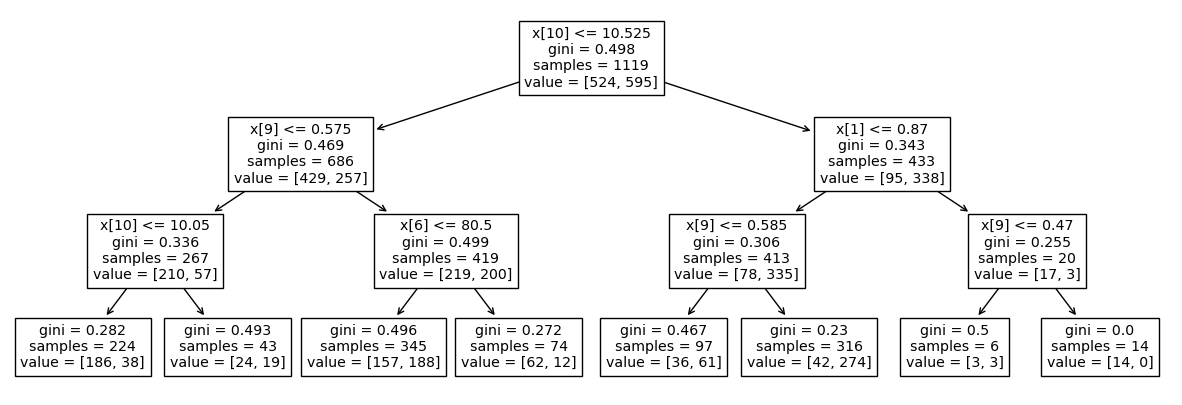

In [10]:
plt.figure(figsize=(15,5))
tree.plot_tree(tree_3)

In [11]:
# Entropy
# Decision Tree with depth 3
tree_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=15)
tree_3.fit(X_train, y_train)

y_pred = tree_3.predict(X_test)
print('Decision Tree with depth 3:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, tree_3.predict(X_train))}')

# Decision Tree with depth 6
tree_6 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=15)
tree_6.fit(X_train, y_train)

y_pred = tree_6.predict(X_test)
print('\nDecision Tree with depth 6:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, tree_6.predict(X_train))}')

# Decision Tree with depth 10
tree_10 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)
tree_10.fit(X_train, y_train)

y_pred = tree_10.predict(X_test)
y_pred_train = tree_10.predict(X_train)
print('\nDecision Tree with depth 10:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, y_pred_train)}')

Decision Tree with depth 3:
Test F1-score = 0.7582938388625593
Train F1-score = 0.7743732590529249

Decision Tree with depth 6:
Test F1-score = 0.721868365180467
Train F1-score = 0.8215246636771301

Decision Tree with depth 10:
Test F1-score = 0.7865612648221343
Train F1-score = 0.9436860068259385


[Text(0.5, 0.875, 'x[10] <= 10.525\nentropy = 0.997\nsamples = 1119\nvalue = [524, 595]'),
 Text(0.25, 0.625, 'x[9] <= 0.535\nentropy = 0.954\nsamples = 686\nvalue = [429, 257]'),
 Text(0.125, 0.375, 'x[1] <= 0.335\nentropy = 0.619\nsamples = 169\nvalue = [143, 26]'),
 Text(0.0625, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(0.1875, 0.125, 'entropy = 0.556\nsamples = 162\nvalue = [141, 21]'),
 Text(0.375, 0.375, 'x[6] <= 82.5\nentropy = 0.992\nsamples = 517\nvalue = [286, 231]'),
 Text(0.3125, 0.125, 'entropy = 1.0\nsamples = 421\nvalue = [205, 216]'),
 Text(0.4375, 0.125, 'entropy = 0.625\nsamples = 96\nvalue = [81, 15]'),
 Text(0.75, 0.625, 'x[1] <= 0.87\nentropy = 0.759\nsamples = 433\nvalue = [95, 338]'),
 Text(0.625, 0.375, 'x[9] <= 0.585\nentropy = 0.699\nsamples = 413\nvalue = [78, 335]'),
 Text(0.5625, 0.125, 'entropy = 0.952\nsamples = 97\nvalue = [36, 61]'),
 Text(0.6875, 0.125, 'entropy = 0.565\nsamples = 316\nvalue = [42, 274]'),
 Text(0.875, 0.375, 'x[9] 

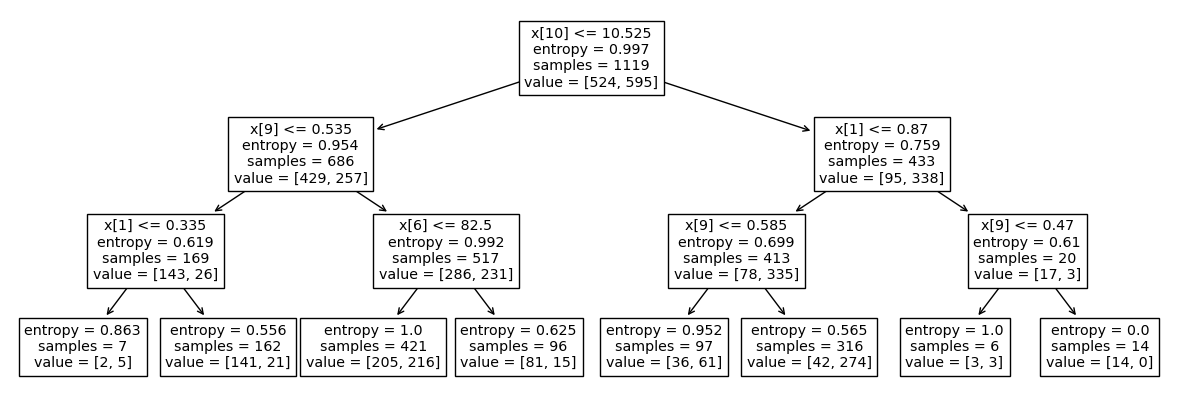

In [12]:
plt.figure(figsize=(15,5))
tree.plot_tree(tree_3)

Ошибки F1 деревьев решений с разной глубиной при использовании критериев Джини и энтропии имееют схожие результаты.

**Random Forest Classifier**

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=15)

In [15]:
y_pred = rfc.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1_score = {f1}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc}')
precision = precision_score(y_test, y_pred)
print(f'Precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall = {recall}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1_score = 0.7520325203252033
Accuracy = 0.7458333333333333
Precision = 0.7974137931034483
Recall = 0.7115384615384616

Confusion Matrix:
[[173  47]
 [ 75 185]]


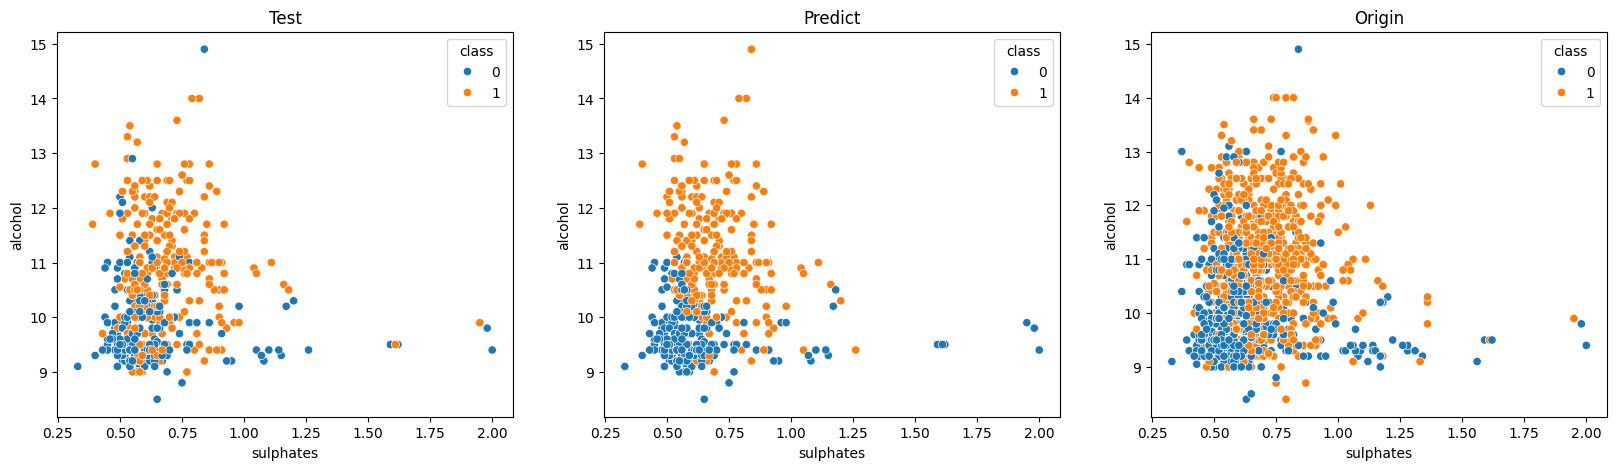

In [17]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['sulphates'], y=X_test['alcohol'], hue=y_test)
plt.xlabel('sulphates')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['sulphates'], y=X_test['alcohol'], hue=y_pred)
plt.xlabel('sulphates')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['sulphates'], y=df['alcohol'], hue=df['quality'])
plt.legend(title='class')
plt.title('Origin')

plt.show()

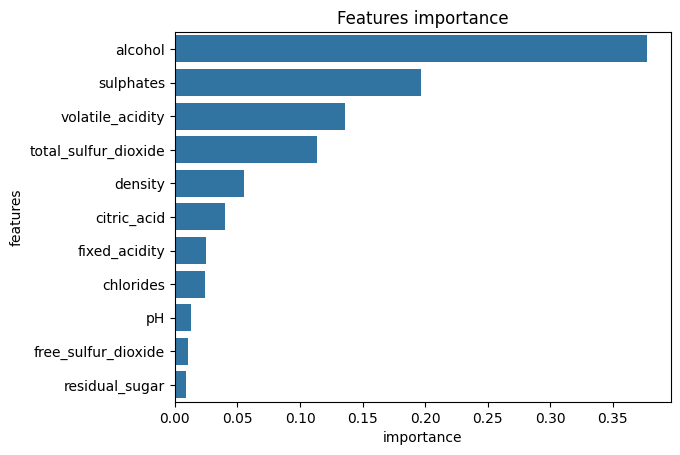

In [18]:
feature_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Features importance')
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

In [19]:
feature_imp

alcohol                 0.377494
sulphates               0.196303
volatile_acidity        0.135763
total_sulfur_dioxide    0.113731
density                 0.055177
citric_acid             0.040095
fixed_acidity           0.025232
chlorides               0.024395
pH                      0.012788
free_sulfur_dioxide     0.010554
residual_sugar          0.008469
dtype: float64

In [20]:
# Оставляем только важные признаки
X = df[['alcohol', 'sulphates', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'chlorides', 'citric_acid']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=15)

In [21]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=15)

In [22]:
y_pred = rfc.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1_score = {f1}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc}')
precision = precision_score(y_test, y_pred)
print(f'Precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall = {recall}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1_score = 0.7643564356435644
Accuracy = 0.7520833333333333
Precision = 0.7877551020408163
Recall = 0.7423076923076923

Confusion Matrix:
[[168  52]
 [ 67 193]]


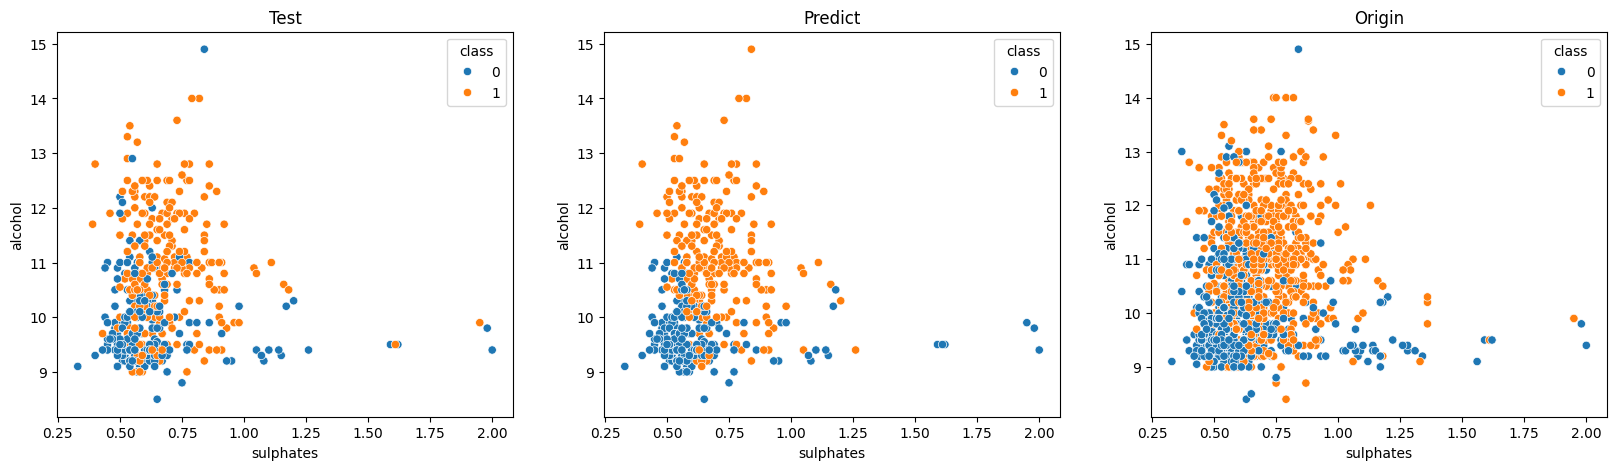

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['sulphates'], y=X_test['alcohol'], hue=y_test)
plt.xlabel('sulphates')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['sulphates'], y=X_test['alcohol'], hue=y_pred)
plt.xlabel('sulphates')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['sulphates'], y=df['alcohol'], hue=df['quality'])
plt.legend(title='class')
plt.title('Origin')

plt.show()

При исключении неважных признаков результаты модели улучшились.

# Regression

In [24]:
df = df_copy
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
X = df.iloc[:, :11]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=15)

**Decision Tree Regressor**

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=15)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
print(f'Test MSE = {mean_squared_error(y_test, y_pred)}')
print(f'Test MAE = {mean_absolute_error(y_test, y_pred)}')

y_pred_train = dtr.predict(X_train)
print(f'Train MSE = {mean_squared_error(y_train, y_pred_train)}')
print(f'Train MAE = {mean_absolute_error(y_train, y_pred_train)}')

Test MSE = 0.47099449117251985
Test MAE = 0.5412852199739052
Train MSE = 0.41987836900871783
Train MAE = 0.5138162587911649


**Random Forest Regressor**

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=15)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
print(f'Test MSE = {mean_squared_error(y_test, y_pred)}')
print(f'Test MAE = {mean_absolute_error(y_test, y_pred)}')

y_pred_train = rfr.predict(X_train)
print(f'Train MSE = {mean_squared_error(y_train, y_pred_train)}')
print(f'Train MAE = {mean_absolute_error(y_train, y_pred_train)}')

Test MSE = 0.45026457623285293
Test MAE = 0.537928102930481
Train MSE = 0.43033957026281167
Train MAE = 0.5327211765909659
